In [0]:
from sklearn import datasets
myiris = datasets.load_iris()
x = myiris.data
y = myiris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
from sklearn.preprocessing import StandardScaler
print(x[:5])
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
print(x_scaled[:5])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


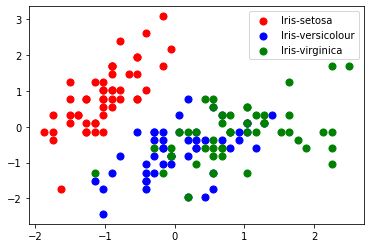

In [0]:
import matplotlib.pyplot as plt
plt.scatter(x_scaled[y == 0, 0], x_scaled[y == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x_scaled[y == 1, 0], x_scaled[y == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x_scaled[y == 2, 0], x_scaled[y == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.legend()

In [0]:
from sklearn.cluster import KMeans
objective = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(x_scaled)
    objective.append(kmeans.inertia_)

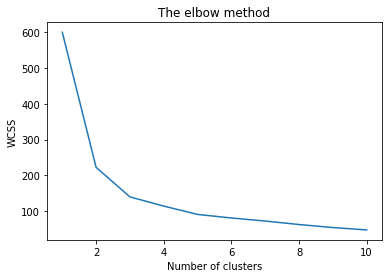

In [0]:
plt.plot(range(1, 11), objective)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')      #within cluster sum of squares
plt.show()

In [0]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(x_scaled)



[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


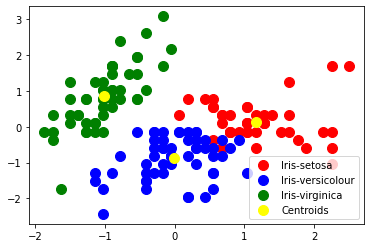

In [0]:
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3)

KNN_model=KNeighborsClassifier(n_neighbors=40, weights='distance')
KNN_model.fit(X_train,y_train)
y_pred=KNN_model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report
cr= classification_report(y_pred,y_test)

In [0]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.89      0.92        19
           2       0.83      0.91      0.87        11

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

